In [1]:
# import all modules needed
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from norm_chi2 import norm_chi2
from ANOVA import oneway_ANOVA, twoway_ANOVA, f_test

In [2]:
# if not os.path.exists('./img'):
#     os.system('mkdir ./img')

## Q1

In [3]:
# prepare the dataset
__Contry = ['Bel.', 'Den.', 'Fra.', 'Ger.', 'Gre.', 'Ire.', 'Ita.', 'Net.', 'Por.', 'Spa.', 'U.K.']
__GDP = [161.8, 104.1, 956.9, 1189.1, 53.4, 33.9, 856.8, 223.6, 45.3, 375.7, 832.6]
__Logistics_Bill = [19, 14, 110, 160, 7, 5, 102, 27, 6, 45, 96]
df = pd.DataFrame({
    'Contry': __Contry,
    'GDP': __GDP,
    'LBill': __Logistics_Bill
})
# sort by GDP, then LBill
df = df.sort_values(by=['GDP', 'LBill'], ascending=[False, False], ignore_index=True)
df.describe()

,GDP,LBill
count,11.000000,11.000000
mean,439.381818,53.727273
std,432.150619,53.840674
min,33.900000,5.000000
25%,78.750000,10.500000
50%,223.600000,27.000000
75%,844.700000,99.000000
max,1189.100000,160.000000


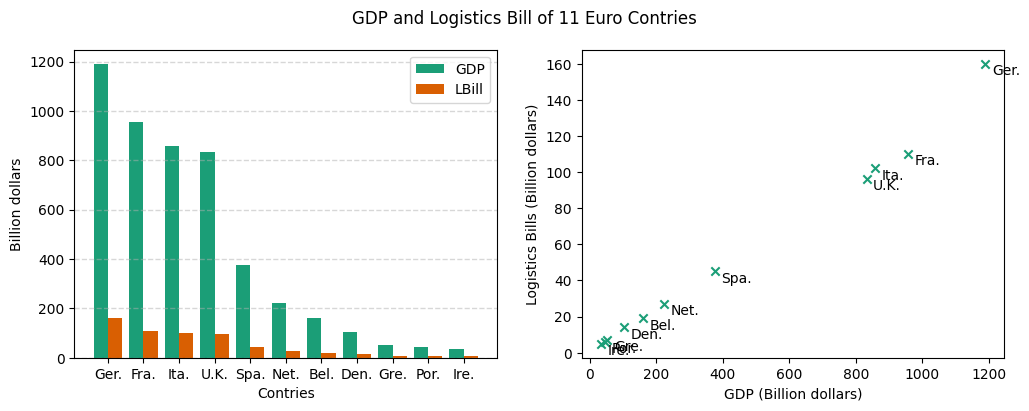

In [4]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) # split 2 subplots

# define ax1
xpos = np.arange(0, 22, 2)
width = 0.8
ax[0].grid(visible=True, axis='y', zorder=0, alpha=0.5, linestyle='--', linewidth=1)
ax[0].bar(xpos-width/2, df['GDP'], width=width, label='GDP', color='#1b9e77')
ax[0].bar(xpos+width/2, df['LBill'], width=width, label='LBill', color='#d95f02')
ax[0].legend()
ax[0].set_xticks(xpos, df['Contry'])
ax[0].set_xticklabels(ax[0].get_xticklabels())
ax[0].set_xlabel('Contries')
ax[0].set_ylabel('Billion dollars')

# define ax2
ax[1].scatter(df['GDP'], df['LBill'], marker='x', color='#1b9e77')
for i in range(len(df['Contry'])):
    ax[1].annotate(df['Contry'][i], (df['GDP'][i] + 20, df['LBill'][i] - 6))
ax[1].set_ylabel('Logistics Bills (Billion dollars)')
ax[1].set_xlabel('GDP (Billion dollars)')

fig.suptitle('GDP and Logistics Bill of 11 Euro Contries')
# plt.savefig('img/GDP and Logistics Bill of 11 Euro Contries', transparent=True, dpi=300)
plt.show()

In [5]:
stats.spearmanr(df['LBill'], df['GDP'])

SignificanceResult(statistic=1.0, pvalue=0.0)

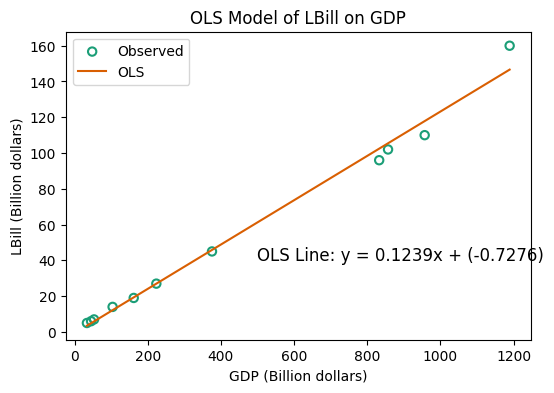

C:\Users\Allen\.venv\aiml\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LBill   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     852.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.17e-10
Time:                        01:35:15   Log-Likelihood:                -33.844
No. Observations:                  11   AIC:                             71.69
Df Residuals:                       9   BIC:                             72.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7276      2.557     -0.285      0.782      -6.512       5.057
GDP            0.1239      0.004     29.194      0.000       0.114       0.134
==============================================================================
Omnibus:                        7.244   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                2.884
Skew:                           1.004   Prob(JB):                        0.236
Kurtosis:                       4.502   Cond. No.                         881.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
X = sm.add_constant(df['GDP'])
Y = df['LBill']
model = sm.OLS(Y, X).fit()
y = model.predict(X)

intercept, slope = model.params
mse = mean_squared_error(Y, y)
r2 = r2_score(Y, y)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.scatter(df['GDP'], df['LBill'], label='Observed', color='none', marker='o', edgecolor='#1b9e77', linewidth=1.5)
ax.plot(df['GDP'], y, label='OLS', color='#d95f02', linewidth=1.5)
ax.legend()
ax.set_title('OLS Model of LBill on GDP')
ax.set_xlabel('GDP (Billion dollars)')
ax.set_ylabel('LBill (Billion dollars)')
plt.text(500, 40, f'OLS Line: y = {slope:.4f}x + ({intercept:.4f})', fontsize=12, color='k')

# plt.savefig('img/OLS.png', transparent=True, dpi=300)
plt.show()

model.summary()

In [7]:
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 27.53770515142751
R^2: 0.9895504051076529


In [8]:
res = df.copy()
res['Fitted'] = model.fittedvalues
res['Residual'] = res['LBill'] - res['Fitted']
res['Std_Res'] = stats.zscore(res['Residual'])
res

,Contry,GDP,LBill,Fitted,Residual,Std_Res
0,Ger.,1189.1,160,146.643668,13.356332,2.545208
1,Fra.,956.9,110,117.865939,-7.865939,-1.498948
2,Ita.,856.8,102,105.460035,-3.460035,-0.659351
3,U.K.,832.6,96,102.460806,-6.460806,-1.231184
4,Spa.,375.7,45,45.834860,-0.834860,-0.159093
5,Net.,223.6,27,26.984332,0.015668,0.002986
6,Bel.,161.8,19,19.325143,-0.325143,-0.061960
7,Den.,104.1,14,12.174088,1.825912,0.347949
8,Gre.,53.4,7,5.890579,1.109421,0.211413
9,Por.,45.3,6,4.886705,1.113295,0.212152


**Normality Test Result using Chi^2 method for OLS Residuals**
--------------------------------------------------------------------------------------------------------------------------------
Descriptive statistics
_____________
  Residuals  
-------------
Count      11
Mean    -0.00
Std      1.05
Min     -1.50
Max      2.55
_____________

________________________________
     Quantiles and Outliers     
--------------------------------
Quantile 1 (25%)           -0.41
Quantile 2 (50%, Median)    0.00
Quantile 3 (75%)            0.25
IQR (Q3 - Q1)               0.66
Extreme min                -1.40
Extreme max                 1.24
________________________________

_________________________
   Classes description   
-------------------------
Number of Classes    4.46
Rounded number          5
Class Range          0.81
_________________________


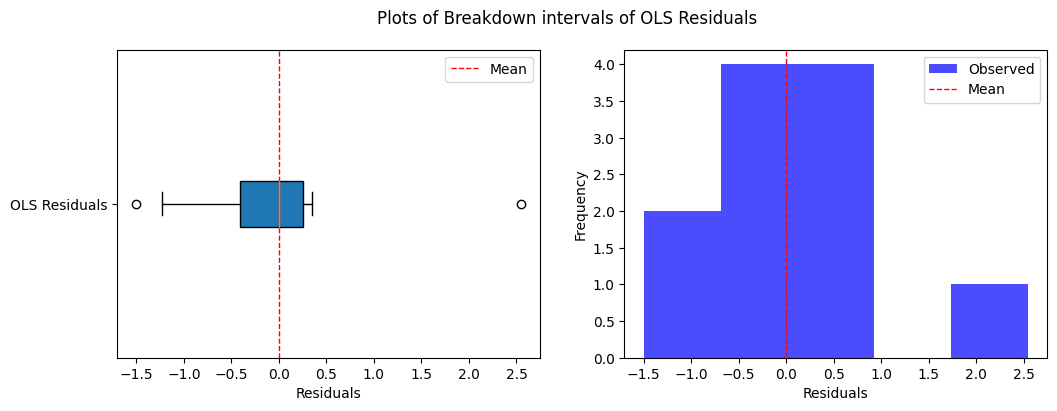

Final Chi^2 Table
___________________________________________________________________________________
Index   Intervals   Frequency   CDF Values   Bin Frequency   Exp Value   Chi Square
-----------------------------------------------------------------------------------
    0       -0.69        2.00         0.26            0.26        2.81       0.2325
    1        0.12        4.00         0.55            0.29        3.19       0.2070
    2        0.93        4.00         0.81            0.27        2.93       0.3876
    3        1.74        0.00         0.95            0.14        1.53       1.5328
    4        2.55        1.00         0.99            0.04        0.45       0.6560
  sum         nan       11.00          nan            0.99       10.92       3.0159
___________________________________________________________________________________
Chi^2 Statistic: 3.0159
P Value: 0.2240
------------------------------------------------------------------------------------------------------

In [9]:
norm_chi2(res['Std_Res'].values, title='OLS Residuals', xlabel='Residuals').showresult()

In [10]:
# Parameters
alpha = 0.05
x_bar = df['GDP'].mean()
s_x = df['GDP'].std()
n = len(df['GDP'])
t_value = stats.t.ppf(1 - alpha/2, df=n-2)

predict_X = [0, 1, 600]
residuals = res['Residual']
RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n - 1)))
    prediction = model.predict([[1, x_new]])[0]
    lower_bound = prediction - t_value * SE_pred
    upper_bound = prediction + t_value * SE_pred
    return SE_pred, lower_bound, prediction, upper_bound
    

# Prepare the table with the results
prediction_table = pd.DataFrame([predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in predict_X],
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=predict_X)

# Add t-value and error columns
prediction_table['t_value'] = t_value

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

# Show the updated prediction table
prediction_table = prediction_table.reset_index().rename(columns={'index': 'GDP (X)'})

prediction_table

,GDP (X),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound
0,0,2.262157,6.340050,14.342191,-15.069746,-0.727555,13.614635
1,1,2.262157,6.338803,14.339368,-14.942988,-0.603620,13.735748
2,600,2.262157,6.097695,13.793944,59.839559,73.633503,87.427446


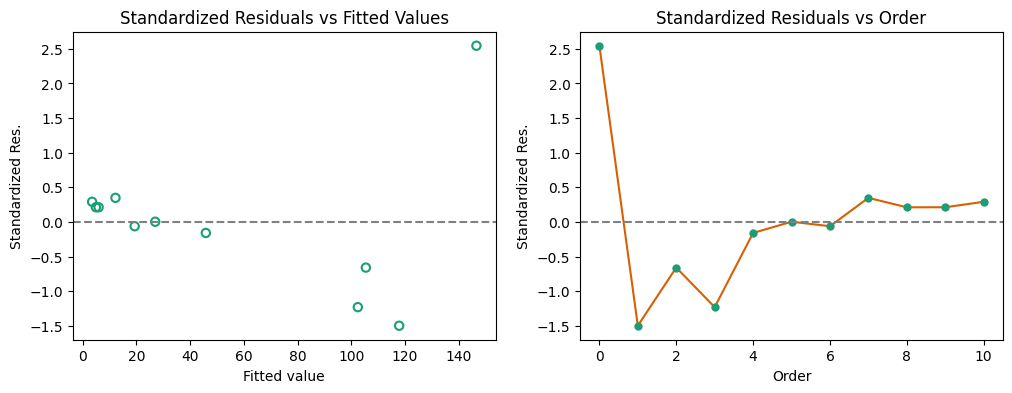

In [11]:
# Residuals vs Fitted values
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(res['Fitted'], res['Std_Res'], color='none', marker='o', edgecolor='#1b9e77', linewidth=1.5)
ax[0].axhline(0, color='grey', linestyle='--')
ax[0].set_xlabel('Fitted value')
ax[0].set_ylabel('Standardized Res.')
ax[0].set_title('Standardized Residuals vs Fitted Values')

# Residuals vs Order of data with line connecting points
ax[1].plot(res.index, res['Std_Res'], color='#d95f02', marker='o', markerfacecolor='#1b9e77', markeredgecolor='none', linestyle='-')  # Line added here
ax[1].axhline(0, color='grey', linestyle='--')
ax[1].set_xlabel('Order')
ax[1].set_ylabel('Standardized Res.')
ax[1].set_title('Standardized Residuals vs Order')

plt.savefig('img/Redisuals.png', transparent=True, dpi=300)
plt.show()

## Q2

### Q2(i)

In [12]:
c10 = [
    [0.4, 2.0, 3.0, 1.7, 1.8],
    [0.5, 2.0, 0.9, 1.9, 6.0],
    [4.7, 3.4, 1.2, 3.1, 4.3],
    [3.6, 2.6, 2.4, 3.8, 5.1]
]
c12 = [
    [1.5, 2.0, 2.8, 2.1, 2.0],
    [3.4, 2.1, 0.6, 4.5, 1.6],
    [4.4, 4.2, 3.2, 3.7, 2.9],
    [4.3, 3.3, 4.2, 3.8, 3.5]
]

**Normality Test Result using Chi^2 method for 10% Carbonation**
--------------------------------------------------------------------------------------------------------------------------------
Descriptive statistics
_____________________________
  Deviation from fill level  
-----------------------------
Count                      20
Mean                     2.72
Std                      1.54
Min                      0.40
Max                      6.00
_____________________________

________________________________
     Quantiles and Outliers     
--------------------------------
Quantile 1 (25%)            1.77
Quantile 2 (50%, Median)    2.50
Quantile 3 (75%)            3.65
IQR (Q3 - Q1)               1.88
Extreme min                -1.04
Extreme max                 6.46
________________________________

_________________________
   Classes description   
-------------------------
Number of Classes    5.32
Rounded number          6
Class Range          0.93
_________________________

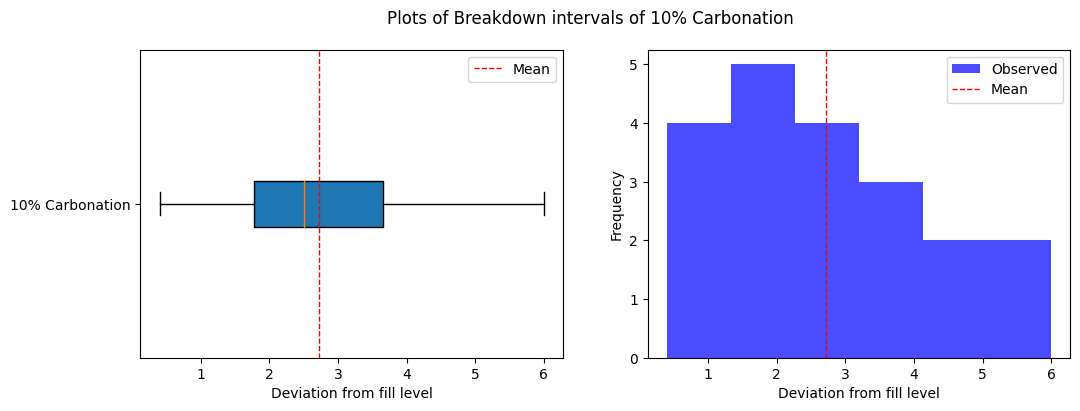

Final Chi^2 Table
___________________________________________________________________________________
Index   Intervals   Frequency   CDF Values   Bin Frequency   Exp Value   Chi Square
-----------------------------------------------------------------------------------
    0        1.33        4.00         0.18            0.18        3.68       0.0275
    1        2.27        5.00         0.38            0.20        4.00       0.2475
    2        3.20        4.00         0.62            0.24        4.76       0.1213
    3        4.13        3.00         0.82            0.20        3.96       0.2344
    4        5.07        2.00         0.94            0.12        2.31       0.0422
    5        6.00        2.00         0.98            0.05        0.94       1.1781
  sum         nan       20.00          nan            0.98       19.67       1.8511
___________________________________________________________________________________
Chi^2 Statistic: 1.8511
P Value: 0.6117
------------------

In [13]:
norm_chi2(np.concatenate(c10), title='10% Carbonation', xlabel='Deviation from fill level').showresult()

**Normality Test Result using Chi^2 method for 12% Carbonation**
--------------------------------------------------------------------------------------------------------------------------------
Descriptive statistics
_____________________________
  Deviation from fill level  
-----------------------------
Count                      20
Mean                     3.00
Std                      1.13
Min                      0.60
Max                      4.50
_____________________________

________________________________
     Quantiles and Outliers     
--------------------------------
Quantile 1 (25%)            2.08
Quantile 2 (50%, Median)    3.25
Quantile 3 (75%)            3.90
IQR (Q3 - Q1)               1.82
Extreme min                -0.66
Extreme max                 6.64
________________________________

_________________________
   Classes description   
-------------------------
Number of Classes    5.32
Rounded number          6
Class Range          0.65
_________________________

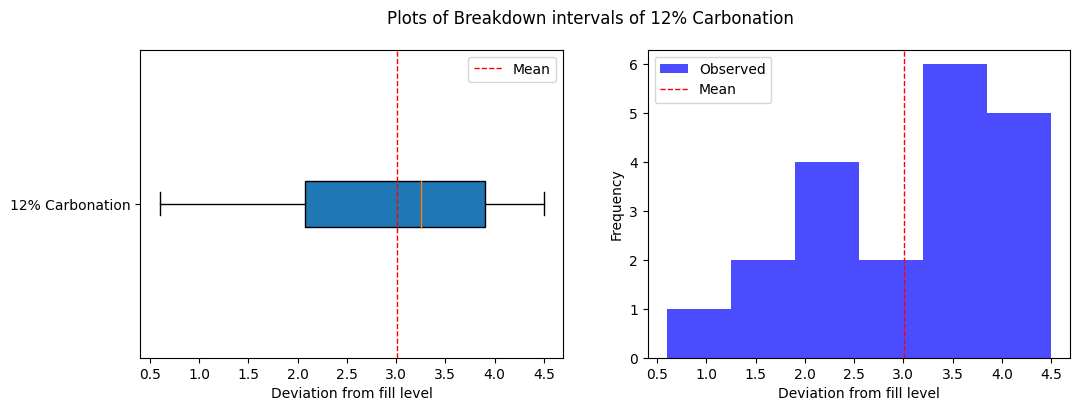

Final Chi^2 Table
___________________________________________________________________________________
Index   Intervals   Frequency   CDF Values   Bin Frequency   Exp Value   Chi Square
-----------------------------------------------------------------------------------
    0        1.25        1.00         0.06            0.06        1.19       0.0306
    1        1.90        2.00         0.16            0.10        2.07       0.0026
    2        2.55        4.00         0.34            0.18        3.60       0.0451
    3        3.20        2.00         0.57            0.23        4.51       1.3997
    4        3.85        6.00         0.77            0.20        4.10       0.8859
    5        4.50        5.00         0.91            0.13        2.69       1.9907
  sum         nan       20.00          nan            0.91       18.16       4.3546
___________________________________________________________________________________
Chi^2 Statistic: 4.3546
P Value: 0.2858
------------------

In [14]:
norm_chi2(np.concatenate(c12), title='12% Carbonation', xlabel='Deviation from fill level').showresult()

In [15]:
# testing variances using f test
for i in range(len(c10)):
    for j in range(i + 1, len(c10)):
        f_test(c10[i], c10[j])

for i in range(len(c12)):
    for j in range(i + 1, len(c12)):        
        f_test(c12[i], c12[j])

F Statistic = 0.1802, P Value = 0.0628
F Statistic = 0.4652, P Value = 0.2384
F Statistic = 0.7368, P Value = 0.3872
F Statistic = 2.5812, P Value = 0.1904
F Statistic = 4.0880, P Value = 0.1007
F Statistic = 1.5838, P Value = 0.3334
F Statistic = 0.0926, P Value = 0.0203
F Statistic = 0.5332, P Value = 0.2787
F Statistic = 1.1604, P Value = 0.4444
F Statistic = 5.7568, P Value = 0.0592
F Statistic = 12.5294, P Value = 0.0156
F Statistic = 2.1765, P Value = 0.2349


In [16]:
oneway_ANOVA(c10).showresult()

ANOVA Result Table
_____________________________________________________________________________________________
Source of Variation   Sums of Squares   Degrees of Freedom   Mean Squares   F Ratio   P Value
---------------------------------------------------------------------------------------------
Between Groups                  10.44                    3           3.48    1.6059    0.2273
Within Groups                  34.672                   16          2.167              
Total                          45.112                   19                          
_____________________________________________________________________________________________


In [17]:
oneway_ANOVA(c12).showresult()

ANOVA Result Table
_____________________________________________________________________________________________
Source of Variation   Sums of Squares   Degrees of Freedom   Mean Squares   F Ratio   P Value
---------------------------------------------------------------------------------------------
Between Groups                11.4735                    3         3.8245    4.8503    0.0138
Within Groups                  12.616                   16         0.7885              
Total                         24.0895                   19                          
_____________________________________________________________________________________________


In [18]:
twoway_ANOVA([c10, c12]).showresult()

ANOVA Result Table
_____________________________________________________________________________________________
Source of Variation   Sums of Squares   Degrees of Freedom   Mean Squares   F Ratio   P Value
---------------------------------------------------------------------------------------------
Between Groups                21.8747                    3         7.2916    4.9342    0.0063
Between Blocks                 0.8122                    1         0.8122    0.5497    0.4639
Interaction                    0.0388                    3         0.0129    0.0087    0.9989
Error                          47.288                   32         1.4778              
Total                         70.0138                   39                          
_____________________________________________________________________________________________


### Q2(ii)

In [19]:
stats.poisson.pmf(2, 1.5)

0.25102143016698353

In [20]:
stats.poisson.cdf(2, 1.5)

0.8088468305380582

In [21]:
stats.poisson.pmf(0, 1.5) ** 3

0.011108996538242304

## Q3

### Q3(i)

In [22]:
ca = [19.4, 20.7, 21.8, 14.4, 16.1, 16.8, 14.7, 16.7, 19.3, 16.8, 17.7, 19.8]
gb = [18.7, 24.4, 19.3, 15.6, 18.0, 21.7, 27.0, 13.8, 18.0, 20.8, 17.1, 28.2]
dfq3 = pd.DataFrame(data=np.array([ca, gb]).T, columns=['Computer Assisted', 'Group Based'])
dfq3.describe()

,Computer Assisted,Group Based
count,12.000000,12.000000
mean,17.850000,20.216667
std,2.344626,4.420579
min,14.400000,13.800000
25%,16.550000,17.775000
50%,17.250000,19.000000
75%,19.500000,22.375000
max,21.800000,28.200000


In [23]:
stats.ttest_ind(ca, gb, equal_var=False, alternative='less')

TtestResult(statistic=-1.6384042526010385, pvalue=0.05999996948602885, df=16.735024215745145)

In [24]:
# calculate welch's t-test t value and degree of freedom
t = (dfq3.mean().loc['Computer Assisted'] - dfq3.mean().loc['Group Based']) * np.sqrt(len(ca)) / np.sqrt(dfq3.var(ddof=1).sum())
v = (len(ca) - 1) * (dfq3.var(ddof=1).sum() ** 2) / dfq3.var(ddof=1).apply(lambda x: x ** 2).sum()
print(f't = {t:.4f}, v = {v: .4f}')
print(f'p = {stats.t.cdf(t, v):.4f}, t_c = {stats.t.ppf(0.05, v):.4f}')
print(f't = {t:.8f}, t_c_6 = {stats.t.ppf(0.06, v):.8f}')

t = -1.6384, v =  16.7350
p = 0.0600, t_c = -1.7412
t = -1.63840425, t_c_6 = -1.63840396


In [25]:
# compare variance using f test
f_test(ca, gb)
ddof = len(ca) - 1
f = dfq3.var(ddof=1).loc['Group Based'] / dfq3.var(ddof=1).loc['Computer Assisted']
print(f'f = {f:.4f}, d = {ddof}')
print(f'p = {stats.f.ppf(0.05, ddof, ddof):.4f}, f_c = {stats.f.sf(f, ddof, ddof):.4f}')

F Statistic = 0.2813, P Value = 0.0231
f = 3.5548, d = 11
p = 0.3549, f_c = 0.0231


### Q3(ii)

In [26]:
mu, sigma2, cnt = 44.175, 1.017, 100
_low, _up = 44 - 2.5, 44 + 2.5
pup = stats.norm.cdf((_up - mu) / np.sqrt(sigma2))
plow = stats.norm.cdf((_low - mu) / np.sqrt(sigma2))
print(f'{pup:.4f}, {plow:.4f}, {pup - plow:.4f}')

0.9894, 0.0040, 0.9854


In [27]:
alpha = 0.05
t_1 = (mu - _low) * np.sqrt(cnt / sigma2)
p_1 = stats.t.cdf(t_1, cnt - 1)
tc_1 = stats.t.ppf(alpha, cnt - 1)

t_2 = (mu - _up) * np.sqrt(cnt / sigma2)
p_2 = stats.t.sf(t_2, cnt - 1)
tc_2 = stats.t.ppf(1 - alpha, 99)

print(f'{t_1:.4f}, {tc_1:.4f}, {p_1:.4f}')
print(f'{t_2:.4f}, {tc_2:.4f}, {p_2:.4f}')

26.5255, -1.6604, 1.0000
-23.0549, 1.6604, 1.0000


In [28]:
stats.t.interval(0.975, 99, loc=mu, scale=np.sqrt(sigma2))

(41.879732025054736, 46.47026797494526)